In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

0.9999987445412033


C:\Users\jv97\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\jv97\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


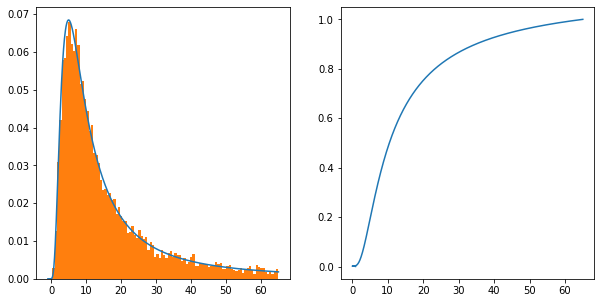

In [7]:
xi = -1
xf = 65
x_max = (5-xi)/0.416778

# A = 1/(x_max*(1/(np.exp(x_max/xf) + 1) - 1/(np.exp(x_max/xi) + 1)))
A = 1/(x_max*(1/(np.exp(x_max/(xf - xi)) + 1)))# - 1/(np.exp(x_max/xi) + 1)))

def f(x):
    x = (x - xi)/x_max
    return A*(1/x)**2*np.exp(1/x)/(1 + np.exp(1/x))**2

# def F(x):
#     return #Not implemented yet

def invF(u):
    return x_max/np.log(A*x_max/u - 1) + xi

print(quad(f,0,xf)[0])#, E(xf))

xs = np.linspace(xi,xf,1000)
sample = invF(np.random.random(10000))

fig, ax = plt.subplots(figsize=(10,5),ncols=2)
ax[0].plot(xs,f(xs))
ax[0].hist(sample,density=True,bins=100);
# ax[0].set(xlim=(0,2.5))
ax[1].plot(np.abs(xs[1:]),np.cumsum(f(np.abs(xs[1:])))/np.sum(f(np.abs(xs[1:]))))
# ax[1].set(xlim=(0,))

In [7]:
xi = 0.4 #degrees
xf = 10
l = -(xf - xi)/np.log(5e-3)

A = 1/(l*(1-np.exp(-(xf-xi)/l)))

def e(x):
    return A*np.exp(-(x-xi)/l)

def E(x):
    return A*l*(1-np.exp(-(x-xi)/l))
def invE(u):
    return xi - l*np.log(1 - u/(A*l))

quad(e,xi,xf)[0], E(xf)

(0.9999999999999998, 0.9999999999999999)

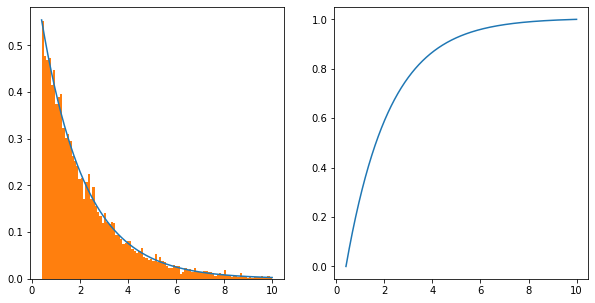

In [8]:
xs = np.linspace(xi,xf,1000)
sample = invE(np.random.random(10000))

fig, ax = plt.subplots(figsize=(10,5),ncols=2)
ax[0].plot(xs,e(xs))
ax[0].hist(sample,density=True,bins=100)
ax[1].plot(xs,E(xs))

# Method 1
Doesn't seem accurate

In [257]:
N = 10000

signal = np.random.random(N)*xf + 0.5
signal = signal[np.abs(signal) > 0.5]

N = signal.shape[0]

pm_mask = np.random.randint(0,2,N,dtype=bool)

reco = signal.copy()
deviation = invE(np.random.random(N))

# reco += deviation
reco[pm_mask] += deviation[pm_mask]
reco[~pm_mask] -= deviation[~pm_mask]

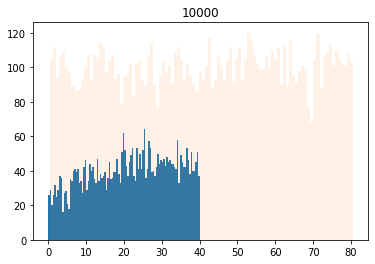

In [155]:
fig, ax = plt.subplots()
ax.set(title=f'{N}')
ax.hist(reco,bins=100,range=(0,xf/2));
ax.hist(signal,bins=100,alpha=0.1);

# Method 2

In [8]:
def fan_out(x):
    N = x.shape[0]
    angles = np.random.random(N)*2*np.pi
    tmp = np.zeros((N,2,2))
    sin = np.sin(angles)
    cos = np.cos(angles)
    tmp[:,0,0] = cos
    tmp[:,0,1] = -sin
    tmp[:,1,0] = sin
    tmp[:,1,1] = cos
    xy = np.hstack([x.reshape(N,1),np.zeros((N,1))])
    return np.matmul(xy.reshape(N,1,2),tmp).reshape(N,2)

In [23]:
N = 20000000
signal = (np.random.random((N,2)) - 0.5)*4*xf
r = np.sqrt(signal[:,0]**2 + signal[:,1]**2)
mask = (r >5)&(r<xf)
signal = signal[mask]

N = signal.shape[0]

reco = signal.copy()
deviation = invF(np.random.random(N)) #invE
deviation = fan_out(deviation)
reco += deviation

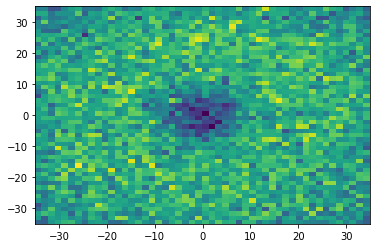

In [24]:
fig, ax = plt.subplots()
lim = 35
# ax.set(xlim=(-lim,lim),ylim=(-lim,lim))

# ax.plot(signal[:,0],signal[:,1],'k.',alpha=0.05)
# ax.plot(reco[:,0],reco[:,1],'r.',alpha=0.05)
ax.hist2d(reco[:,0],reco[:,1],bins=50,range=((-lim,lim),(-lim,lim)));

<ErrorbarContainer object of 3 artists>

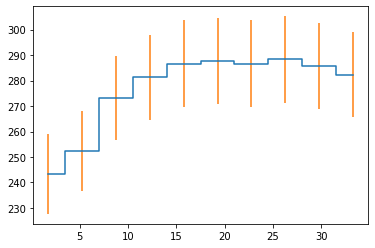

In [25]:
r = np.sqrt(reco[:,0]**2 + reco[:,1]**2)
vals, binedges = np.histogram(r,bins=10,range=(0,lim))
vals = vals/(np.pi*(binedges[1:]**2 - binedges[:-1]**2))
bincenter = 0.5*(binedges[1:] + binedges[:-1])
# vals = vals/bincenter

fig, ax = plt.subplots()
ax.step(bincenter,vals,where='mid')
ax.errorbar(bincenter,vals,np.sqrt(vals),fmt='none')
# ax.hist(r,bins=100,range=(0,xf));